In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
%matplotlib inline

In [2]:
import os
os.listdir('input')

['fulfilment_center_info.csv',
 'meal_info.csv',
 'sample_submission_hSlSoT6.csv',
 'test_QoiMO9B.csv',
 'train.csv']

In [3]:
df_train = pd.read_csv('input/train.csv')
df_meal = pd.read_csv('input/meal_info.csv')
df_center = pd.read_csv('input/fulfilment_center_info.csv')
df_test = pd.read_csv('input/test_QoiMO9B.csv')

In [4]:
display(df_train.head())
display(df_test.head())
display(df_meal.head())
display(df_center.head())

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
print('distinct meal id in meal_info: ',df_meal.meal_id.nunique())
print('distinct meal id in train: ',df_train.meal_id.nunique())
print('distinct meal id in train: ',df_test.meal_id.nunique())
print('*************************************************************')
print('distinct center id in meal_info: ',df_center.center_id.nunique())
print('distinct center id in train: ',df_train.center_id.nunique())
print('distinct center id in train: ',df_test.center_id.nunique())

distinct meal id in meal_info:  51
distinct meal id in train:  51
distinct meal id in train:  51
*************************************************************
distinct center id in meal_info:  77
distinct center id in train:  77
distinct center id in train:  77


In [6]:
df_train = pd.merge(df_train, df_meal, how='inner', on = 'meal_id')
df_train = pd.merge(df_train, df_center, how='inner', on = 'center_id')

df_test = pd.merge(df_test, df_meal, how='inner', on = 'meal_id')
df_test = pd.merge(df_test, df_center, how='inner', on = 'center_id')

In [7]:
df_train.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
5,1493612,6,55,1885,146.53,146.53,0,0,285,Beverages,Thai,647,56,TYPE_C,2.0
6,1110832,7,55,1885,145.53,146.53,0,0,148,Beverages,Thai,647,56,TYPE_C,2.0
7,1461167,8,55,1885,146.53,145.53,0,0,135,Beverages,Thai,647,56,TYPE_C,2.0
8,1102364,9,55,1885,134.83,134.83,0,0,175,Beverages,Thai,647,56,TYPE_C,2.0
9,1018130,10,55,1885,144.56,143.56,0,0,175,Beverages,Thai,647,56,TYPE_C,2.0


In [8]:
df_train.tail(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456538,1259284,136,61,2104,571.33,573.33,0,0,15,Fish,Continental,473,77,TYPE_A,4.5
456539,1166111,137,61,2104,631.53,631.53,0,0,41,Fish,Continental,473,77,TYPE_A,4.5
456540,1241284,138,61,2104,631.53,630.53,0,1,150,Fish,Continental,473,77,TYPE_A,4.5
456541,1314947,139,61,2104,490.82,629.53,0,1,312,Fish,Continental,473,77,TYPE_A,4.5
456542,1020517,140,61,2104,485.03,629.53,0,1,149,Fish,Continental,473,77,TYPE_A,4.5
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456547,1443704,145,61,2104,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

In [11]:
df_train['discount'] = df_train['base_price'] - df_train['checkout_price']
df_train['rate_of_discount'] = df_train['discount'] / df_train['base_price']

df_test['discount'] = df_test['base_price'] - df_test['checkout_price']
df_test['rate_of_discount'] = df_test['discount'] / df_test['base_price']

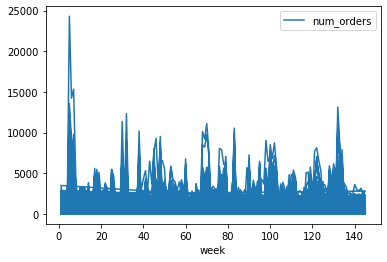

In [12]:
df_train.plot(x='week',y='num_orders')

In [14]:
def order_plot(df,col):
    df.reset_index().plot(col, 'num_orders')
    _ = plt.title("Orders Trend")
    _ = plt.xlabel(col)
    _ = plt.ylabel("Average Orders")

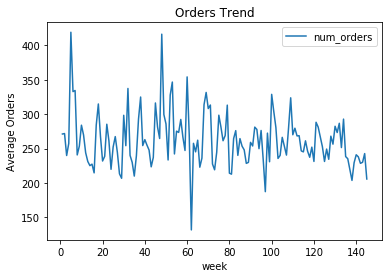

In [15]:
overall_orders_trend = df_train[['week', 'num_orders']].groupby('week').mean()
#overall_orders_trend.head()
order_plot(overall_orders_trend,'week')


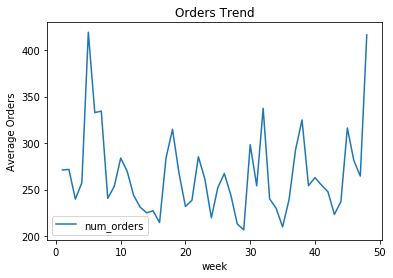

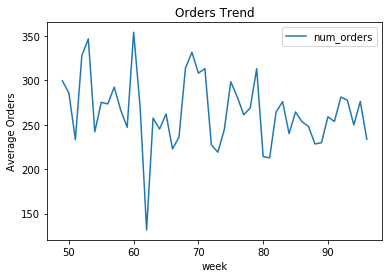

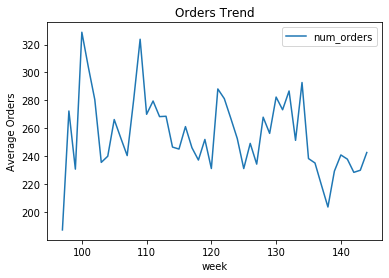

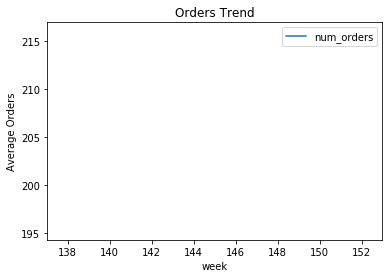

In [16]:
chunk_size = int(overall_orders_trend.shape[0] / 3)
for start in range(0, overall_orders_trend.shape[0], chunk_size):
    df_subset = overall_orders_trend.iloc[start:start + chunk_size]
    order_plot(df_subset,'week')

In [17]:
df_train['week_sin'] = \
        np.sin(2 * np.pi * df_train['week'] / 52.143)
df_train['week_cos'] = \
        np.cos(2 * np.pi * df_train['week'] / 52.143)

df_test['week_sin'] = \
        np.sin(2 * np.pi * df_test['week'] / 52.143)
df_test['week_cos'] = \
        np.cos(2 * np.pi * df_test['week'] / 52.143)

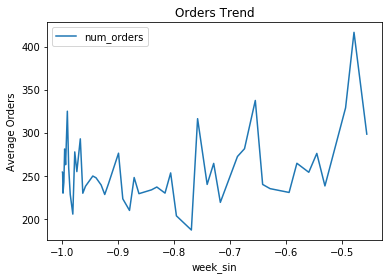

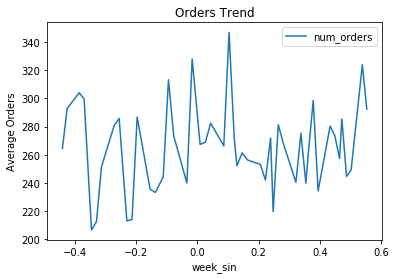

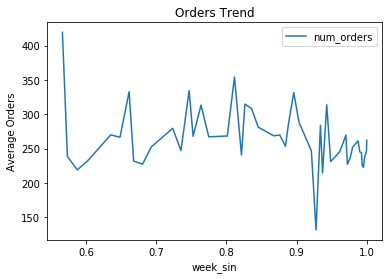

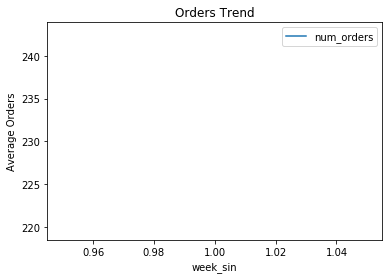

In [18]:
overall_orders_trend_sin = df_train[['week_sin', 'num_orders']].groupby('week_sin').mean()

chunk_size = int(overall_orders_trend_sin.shape[0] / 3)
for start in range(0, overall_orders_trend_sin.shape[0], chunk_size):
    df_subset = overall_orders_trend_sin.iloc[start:start + chunk_size]
    order_plot(df_subset, 'week_sin')

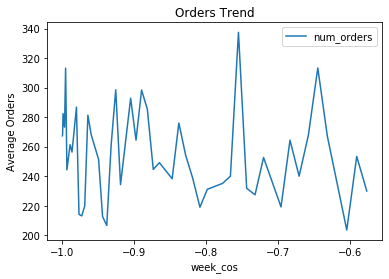

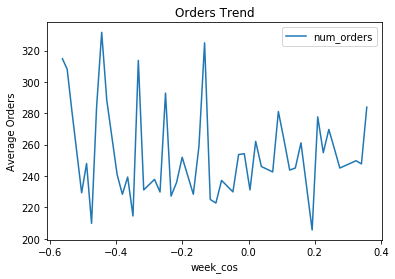

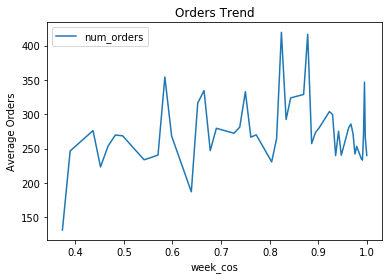

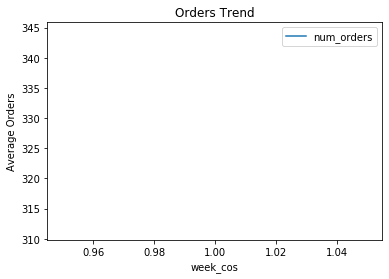

In [19]:
overall_orders_trend_cos = df_train[['week_cos', 'num_orders']].groupby('week_cos').mean()

chunk_size = int(overall_orders_trend_cos.shape[0] / 3)
for start in range(0, overall_orders_trend_cos.shape[0], chunk_size):
    df_subset = overall_orders_trend_cos.iloc[start:start + chunk_size]
    order_plot(df_subset, 'week_cos')

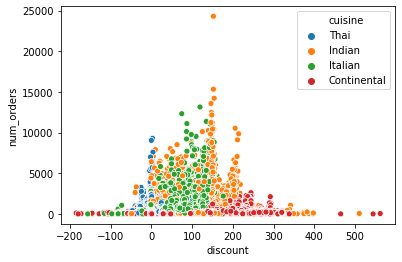

In [25]:
ax = sns.scatterplot(x="discount", y="num_orders", hue="cuisine", data=df_train)

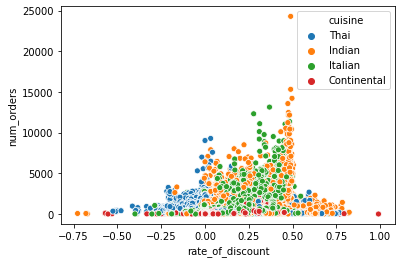

In [26]:
ax = sns.scatterplot(x="rate_of_discount", y="num_orders", hue="cuisine", data=df_train)

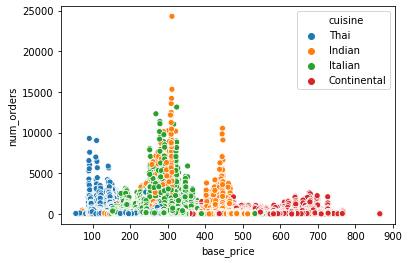

In [27]:
ax = sns.scatterplot(x="base_price", y="num_orders", hue="cuisine", data=df_train)

### __Meal Analysis__

num_orders
cuisine     category                
Continental Beverages        5943046
            Fish              871959
            Pizza            7383720
            Seafood          2715714
Indian      Beverages        2345879
            Biryani           631848
            Desert           1940754
            Rice Bowl       20874063
Italian     Beverages       13953970
            Pasta            1637744
            Salad           10944336
            Sandwich        17636782
Thai        Beverages       18237630
            Extras           3984979
            Other Snacks     4766293
            Soup             1039646
            Starters         4649122

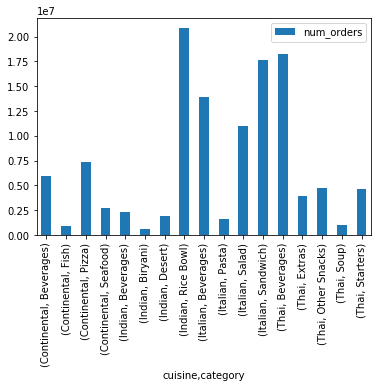

In [49]:
tmp = df_train[['cuisine','category','num_orders']].groupby(['cuisine','category']).sum().copy()
tmp.plot.bar(stacked=True)
tmp

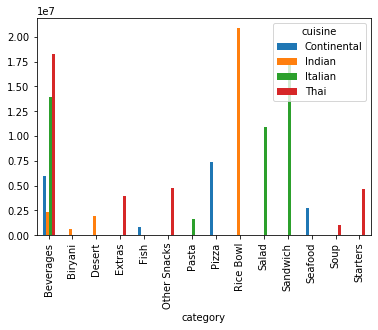

In [89]:
df_train.groupby(['cuisine','category'])['num_orders'].sum().unstack('cuisine').plot.bar()

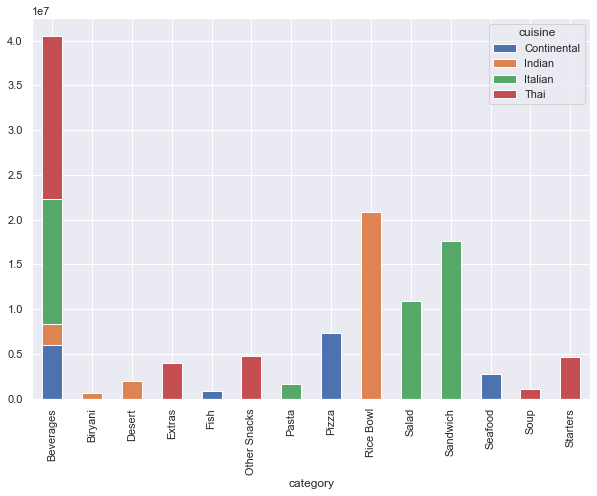

In [116]:
tmp = df_train.groupby(['cuisine','category']).sum()['num_orders'].unstack('cuisine').copy()
tmp.plot.bar(stacked=True, figsize=(10,7))

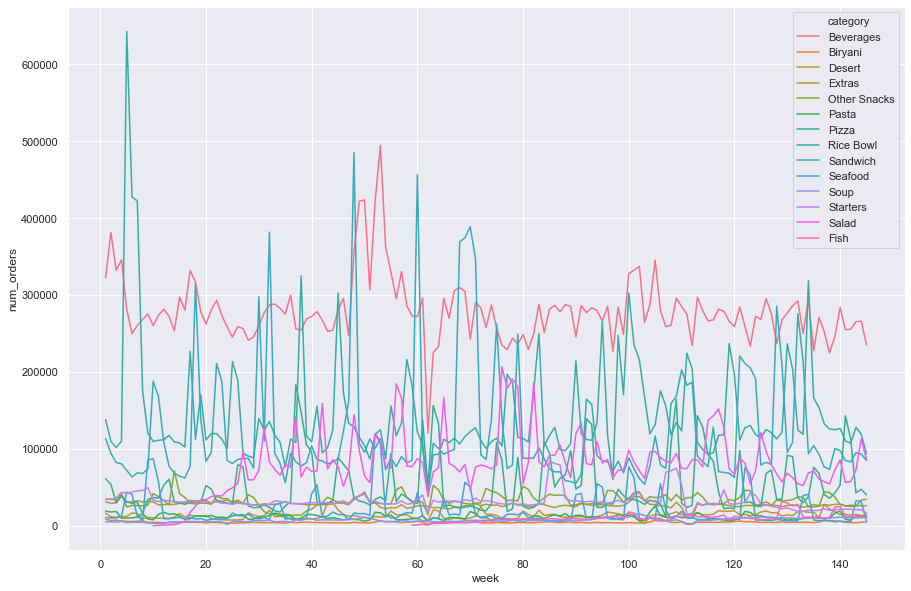

In [106]:
tmp = df_train.groupby(['week','category']).sum()['num_orders'].reset_index()
sns.lineplot(x='week', y="num_orders", data=tmp, hue='category')

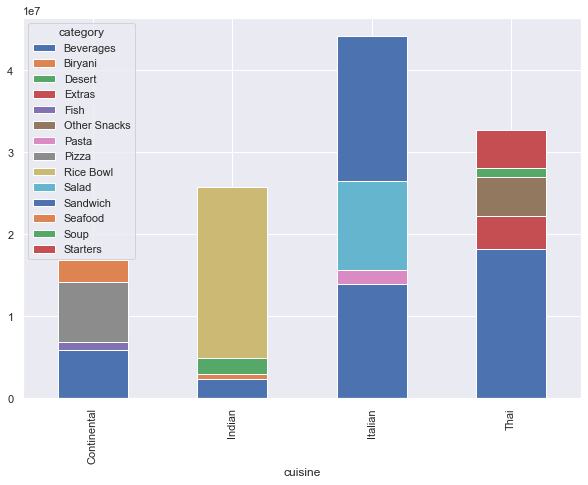

In [117]:
tmp = df_train.groupby(['cuisine','category']).sum()['num_orders'].unstack('category').copy()
tmp.plot.bar(stacked=True, figsize=(10,7))

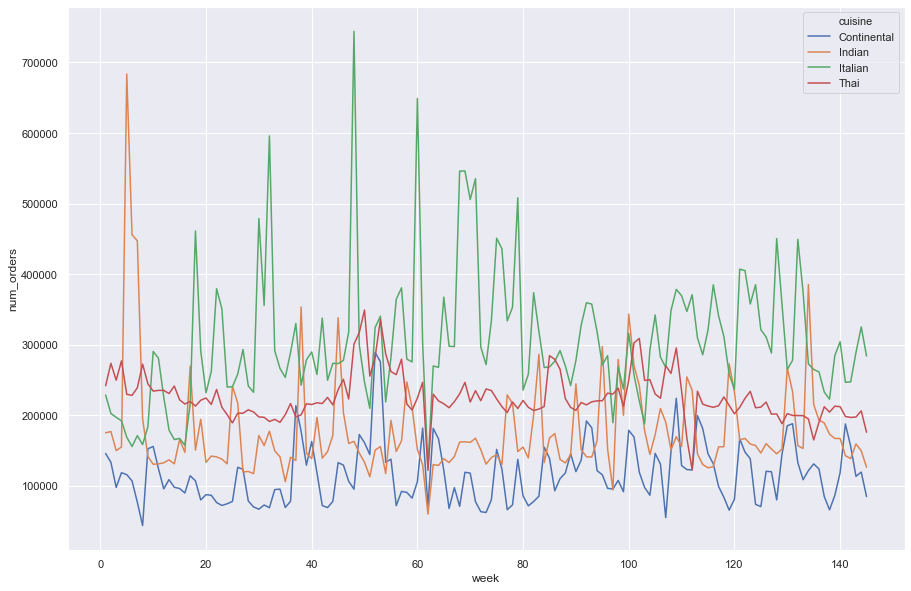

In [119]:
tmp = df_train.groupby(['week','cuisine']).sum()['num_orders'].reset_index()
sns.lineplot(x='week', y="num_orders", data=tmp, hue='cuisine')

### __Promotion Analysis__

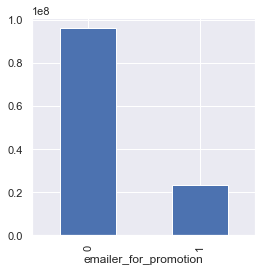

In [129]:
tmp = df_train.groupby(['emailer_for_promotion']).sum()['num_orders']#.reset_index()
fig = plt.gcf()
fig.set_size_inches( 4,4)
tmp.plot.bar()

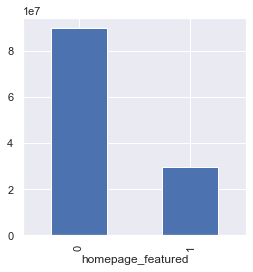

In [130]:
tmp = df_train.groupby(['homepage_featured']).sum()['num_orders']#.reset_index()
fig = plt.gcf()
fig.set_size_inches( 4,4)
tmp.plot.bar()

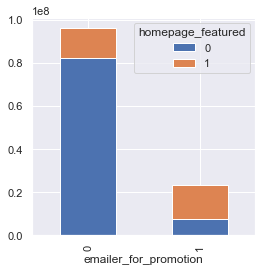

In [135]:
tmp = df_train.groupby(['homepage_featured','emailer_for_promotion']).sum()['num_orders'].unstack('homepage_featured').copy()
sns.set(rc={'figure.figsize':(4,4)})
tmp.plot.bar(stacked = 'True')

### __Center__ analysis